In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!ls -l inputs/

total 6632
-rw-r--r--  1 Ikkei  staff  324288 Dec  7 15:42  starry_night.jpg
-rw-r--r--  1 Ikkei  staff  284759 Dec  9 16:31 csjl.jpeg
-rw-r--r--  1 Ikkei  staff  160407 Dec  9 16:31 guernica.jpg
-rw-r--r--  1 Ikkei  staff  183755 Dec  9 16:31 hk.jpg
-rw-r--r--  1 Ikkei  staff  204053 Dec  7 15:42 nyc_night.jpg
-rw-r--r--  1 Ikkei  staff  173093 Dec  7 15:42 output.jpeg
-rw-r--r--  1 Ikkei  staff   21771 Dec  9 16:31 output_csjl_starry_night.jpg
-rw-r--r--  1 Ikkei  staff   19838 Dec  9 16:31 output_hk_guernica.jpg
-rw-r--r--  1 Ikkei  staff   11328 Dec  9 19:31 output_tubingen_scream.jpg
-rw-r--r--  1 Ikkei  staff   15871 Dec  9 16:31 output_tubingen_seated_nude.jpg
-rw-r--r--  1 Ikkei  staff   16821 Dec  9 16:31 output_tubingen_shipwreck.jpg
-rw-r--r--  1 Ikkei  staff   24776 Dec  9 16:31 output_tubingen_somposition.jpg
-rw-r--r--  1 Ikkei  staff   21918 Dec  9 16:31 output_tubingen_starry_night.jpg
-rw-r--r--  1 Ikkei  staff  187647 Dec  9 16:31 scream.jpg
-rw-r--r--  1 Ikkei  staff

## Define configuration

## Generate Image

tubingen.jpg was resized from (960, 720) to (100, 75)
scream.jpg was resized from (640, 795) to (100, 75)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 31777044.000000
  Number of iterations: 301
  Number of functions evaluations: 321


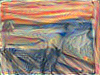

In [14]:
import stylize

content = 'tubingen.jpg'
style = 'scream.jpg'

stylize.apply(content, style, learning_rate=2.0,iters=300, 
              alpha=1, beta=100, noise_ratio=0.6, new_width=100, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

## Average Run Time

In [ ]:
ave_run_time

## Visualize Image

In [ ]:
import matplotlib.pyplot as plt
final_image1 = final_image[0].astype(int)
final_image1 = final_image1[:, :, ::-1]
plt.imshow(final_image1)

## Plot Losses

In [ ]:
import pandas as pd
plt.figure(figsize=(20, 10))
ax1 = plt.gca()
total_losses = pd.DataFrame(total_losses)
content_losses = pd.DataFrame(content_losses)
style_losses = pd.DataFrame(style_losses)
ax1.plot(total_losses, label='total_losses')
ax1.plot(content_losses, label='content losses')
ax1.plot(style_losses, label='style losses')
ax1.legend()
ax1.set_title("Losses over iterations", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_xlabel("Iterations", fontsize=14);